In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from joblib import Parallel, delayed 


In [90]:
read = pd.read_csv('exponential_h_wall_cluster/h_0.5__wall_50.0.csv.csv')
read2 = pd.read_csv('exponential_h_wall_cluster/h_0.95__wall_50.0.csv.csv')
read2=read2[read2<read2.max()].dropna()

In [91]:
read2

,Hitting Time
1,380.115
2,128.409
6,73.263
8,59.737
11,165.409
...,...
49992,90.406
49993,97.894
49996,42.296
49997,112.762


(array([12081.,  9856.,  4893.,  2968.,  2009.,  1553.,  1194.,   957.,
          784.,   659.]),
 array([ 14.167 ,  62.7496, 111.3322, 159.9148, 208.4974, 257.08  ,
        305.6626, 354.2452, 402.8278, 451.4104, 499.993 ]),
 <BarContainer object of 10 artists>)

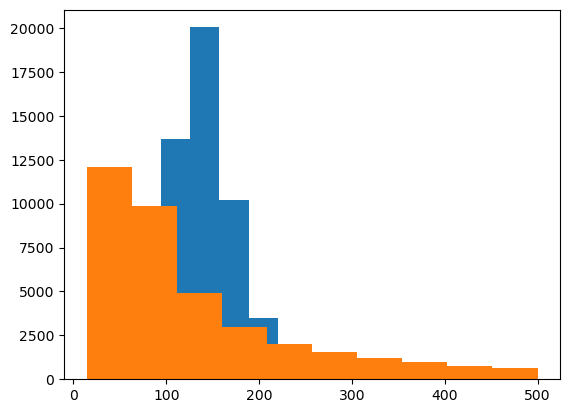

In [92]:
plt.hist(read)
plt.hist(read2)

In [93]:
def boostraping_median(list, n):
    sample = np.random.choice(list, n, replace=True)
    return np.median(sample)

lista = read['Hitting Time'].copy()
boostraping_median(lista, 1000)
medians = []

results05 = Parallel(n_jobs=10)(delayed(boostraping_median)(lista, 100_000) for _ in range(5_000))
results095 = Parallel(n_jobs=10)(delayed(boostraping_median)(read2['Hitting Time'].copy(), 100_000) for _ in range(5_000))

TtestResult(statistic=np.float64(11691.537247603992), pvalue=np.float64(0.0), df=np.float64(6347.970953351529))


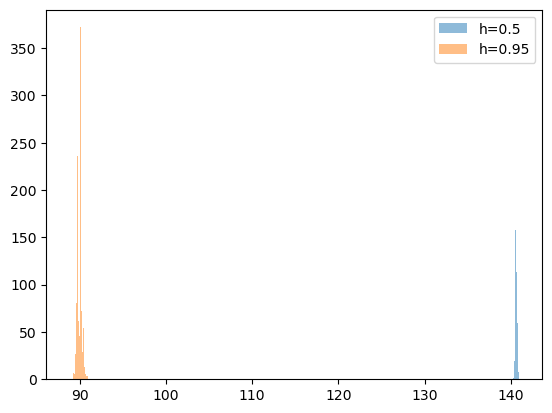

In [105]:
plt.hist(results05, bins=100, alpha=0.5, label='h=0.5')
plt.hist(results095, bins=100, alpha=0.5, label='h=0.95')
plt.legend()

ttest = stats.ttest_ind(results05, results095, alternative='greater', equal_var=False)
print(ttest)

In [106]:
stats.mannwhitneyu(read, read2, alternative='greater')

MannwhitneyuResult(statistic=array([1.25814219e+09]), pvalue=array([0.]))

140.632
90.0195
145.45666462000003
131.2980533636413


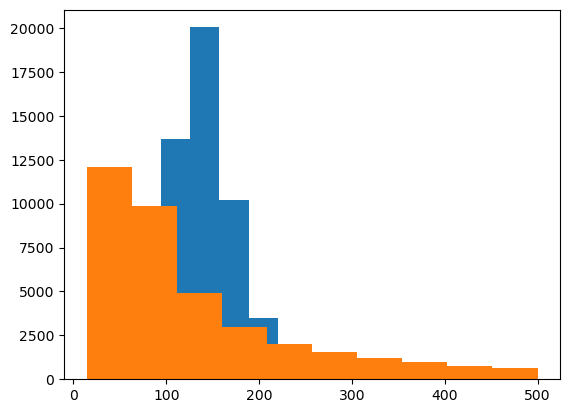

In [104]:
plt.hist(read)
plt.hist(read2)
print(np.median(read))
print(np.median(read2))
print(np.mean(read))
print(np.mean(read2))   